## Imports

**Morphology_Analyzer.py** module is imported

Requirements for Morphology_Analyzer are detailed in requirements.txt

(To install them: *pip3 install -r requirements.txt*)


*Numpy and matplotlib added just for demonstrations*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Morphology_Analyzer import Morphology_Analyzer as MA

## Object creation

### Arguments received:
- **aloc:** arteries location, a list of strings of the arteries measured
- **data:** a dictionary that should include the following keys:
    - age: subject's age
    - dist_cf: distance from carotid to femoral *(more to be implemented)*
    - PAS: systolic brachial pressure
    - PAD: diastolic brachial pressure
- **fs:** sampling frequency used. Default is 500Hz

In [2]:
# Just a list of the arteries where signals were taken from
aloc = ['carotid', 'femoral']
# Example with subject aged 25 with 61 cm between carotid and femoral
# Data has 1000Hz of sampling frequency
data = {'age': 25, 'dist_cf': 61, 'PAS': 120, 'PAD': 80}

new = MA(aloc, data, fs=1000)

## Load signals

Either mat and csv files are supported. Both can be loaded from method: **"load_signals_from_file"**

Path and type of file are always needed.

- mat

If a mat file is loaded, it should be composed of vars named after the artery which the signal was taken from. 

- csv

If a csv file is loaded, column names should be provided. Header is not read as such, so this should be taken into account. Separator should be included too if it's another than space.

Other options if to read signals not using load_signals_from_file method, but using your own choice of read from. And then, load signals with **"load_signals"** method. It should be a list of numpy arrays.

In [3]:
# Load a csv file
new.load_signals_from_file('ACCIARITO_segmento_1.txt', type='csv', col_names=['carotid','femoral'], sep=' ')

# Load a mat file
#new.load_signals_from_file('test_signals_adulto.mat', type='mat')

# Load signals
#new.load_signals(sigs)

In [4]:
# See signals types and shape
print('Type of input: {} '.format(type(new.signals)))
print('Type of each signal: {}'.format(type(new.signals[0])))
print('Shape of each signal: {} ==> (lenght,)'.format(np.shape(new.signals[0])))

Type of input: <class 'list'> 
Type of each signal: <class 'numpy.ndarray'>
Shape of each signal: (21248,) ==> (lenght,)


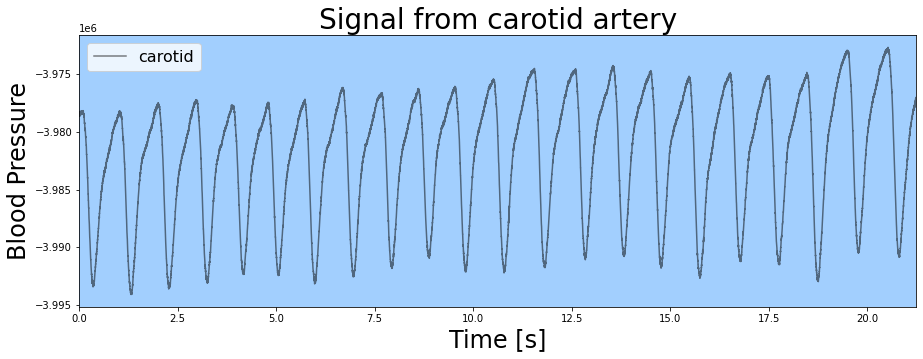

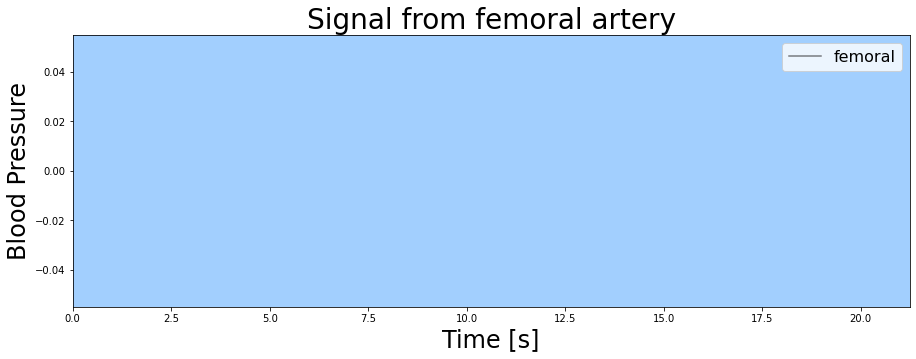

In [5]:
# For demonstration purpose only
new.plot_all_signals()

## Filtering

It should be the next step following loading them. No arguments should be specified.

In [6]:
new.filter_signals()

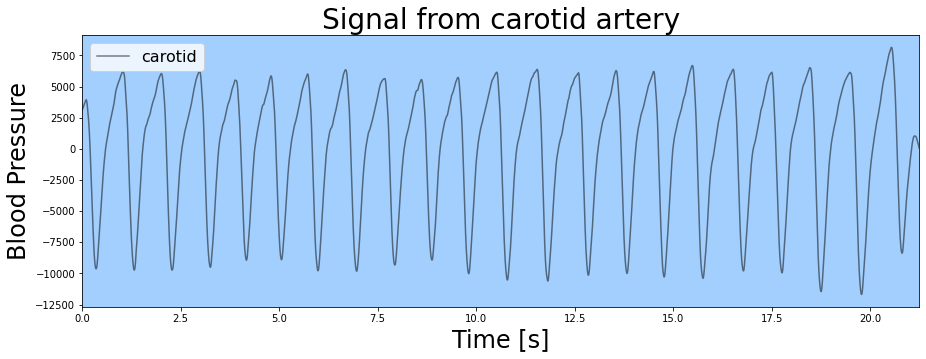

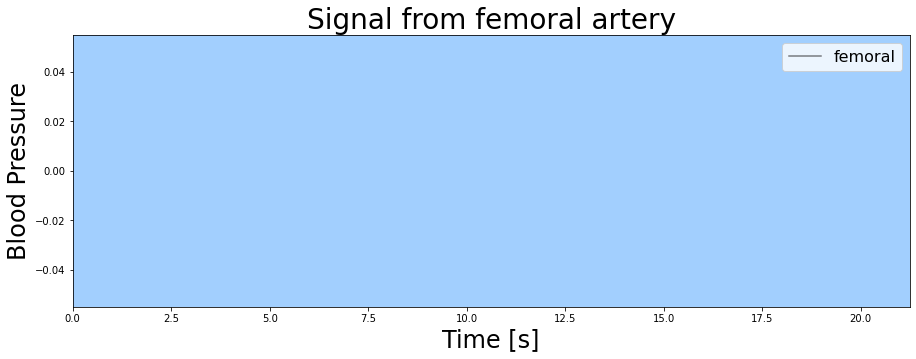

In [7]:
# For demonstration purpose only
new.plot_all_signals()

## Calibration

*calibrate_signals* method calibrates the signals using the brachial systolic and diastolic values, given when creating the object.

Calibration is done by two possible method, this if configured with "adj" value, which could take a value of 1 or 2.
- **adj = 1** Calibration is done with Maximum/Minimum method
- **adj = 2** Calibration is done with Medium and Minimum constant method

This method receives as well **val1** and **val2** as arguments, which are the values to do the calibration acording to the method. If not given, default values are zero. When using **adj = 2** is **highly** recommended to give a value, otherwire calibration would be faulty.

In [8]:
new.calibrate_signals(adj=1)

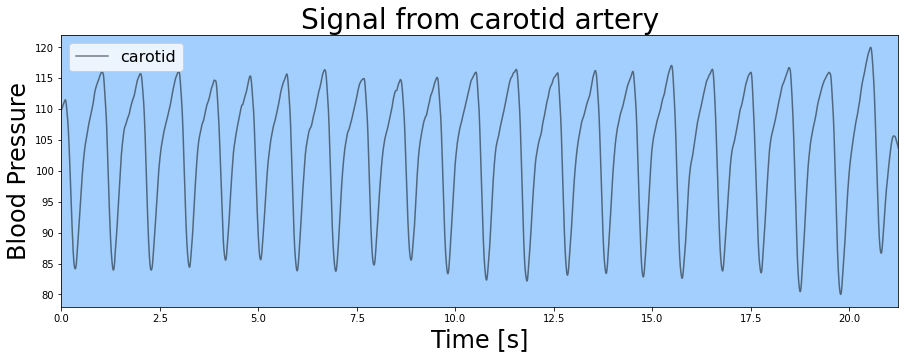

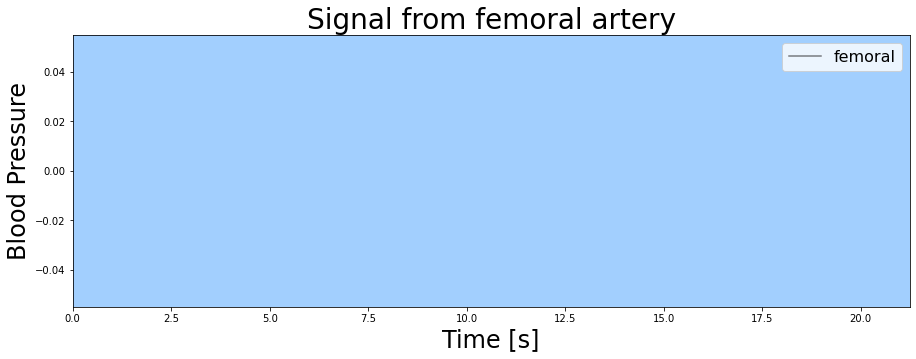

In [9]:
# For demonstration purpose only
new.plot_all_signals()

## Initialize signal detection and synchronization

*init_signals* method will get the detection of onset, systolic peak and dicrotic notchs points on the signals, the amount of heart beats detected on each and it will synchronize all signals according to the carotid signal artery.

Carotid signal artery **should always be loaded in position 0, first of all the others**

Finally, plots will show the detections.

In [10]:
new.init_signals()

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


IndexError: index 0 is out of bounds for axis 0 with size 0

## Obtaining Parameters

For the time being, Pulse Transit Time (PTT) and Pulse Wave Velocity (PWV) between carotid and femoral artery (PTTcf, PWVcf) are obtained. 

Those parameters are loaded in a dictionary in the Morphology_Analyzer object called *"params"*. 
*params* dictionary has the following keys:
- **PTTcf**: a dictionary (nested dictionaries) containing all the information obtained from PTTcf calcs. It has the following keys:
    - *left*: beginning of each pulse, in samples
    - *right*: end of each pulse, in samples
    - *abp_p1*: beginning of each pulse of carotid artery, in secs
    - *abp_p2*: beginning of each pulse of femoral artery, in secs
    - *PTTcf*: pulse transit time of each pulse between carotid and femoral artery
    - *gradins1*: gradients of carotid artery
    - *gradins2*: gradients of femoral artery
- **PTT_stats**: a dictionary containing statistics from PTTcf calcs. It has the following keys:
    - *mean*: mean value of PTTcf
    - *std*: standard deviation of PTTcf

In [ ]:
# Obtain Pulse Transit Time carotid to femoral
new.get_PTT()

In [ ]:
print(new.params['PTT_stats']['mean'])
print(new.params['PTT_stats']['std'])
print(new.params['PTTcf']['PTTcf'])
print(len(new.params['PTTcf']['PTTcf']))

To obtain PWV, first get_PTT should be called.

In [ ]:
# Obtain Pulse Wave Velocity carotid to femoral
new.get_PWV()

In [ ]:
print(new.params['PWVcf_stats']['mean'])
print(new.params['PWVcf_stats']['std'])
print(new.params['PWVcf']['PWVcf'])
print(len(new.params['PWVcf']['PWVcf']))